In [1]:
import gempy as gp
import pyevtk
# Importing auxiliary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Setting options
np.random.seed(1515)
pd.set_option('precision', 2)

In [2]:
geo_model = gp.create_model('Tutorial_ch1_1_Basics')

In [3]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model, [0, 2000., 0, 2000., 0, 750.], [50, 50, 50],
             path_o=data_path + "/data/input_data/getting_started/"
                                "simple_fault_model_orientations.csv",
             path_i=data_path + "/data/input_data/getting_started/"
                                "simple_fault_model_points.csv",
             default_values=True)

Active grids: ['regular']


Tutorial_ch1_1_Basics  2021-01-11 17:13

In [4]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            2.9e+03
$C_o$              2e+05
drift equations   [3, 3]


In [5]:
gp.get_data(geo_model, 'kriging')

,values
range,2.9e+03
$C_o$,2e+05
drift equations,"[3, 3]"


In [6]:
sol = gp.compute_model(geo_model)

In [16]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

In [7]:
# Simple export to VTK:
print('regular grid:\t', sol.grid.regular_grid.resolution, '\t', sol.grid.regular_grid.extent.astype(int))

regular grid:	 [50 50 50] 	 [   0 2000    0 2000    0  750]


x: 0.0 2000.0 50 40.0
y: 0.0 2000.0 50 40.0
z: 0.0 750.0 50 15.0
shape of array to export: (50, 50, 50)


'D:\\Hsintien_tsai\\Python\\TannyVTK20210111.vtr'

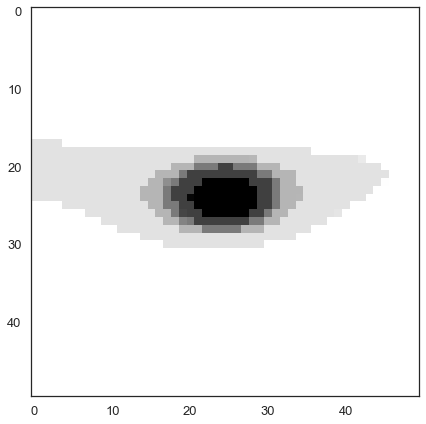

In [15]:
#Export whole, uncropped lith_block
#Get coordinate info from grid & create VTK cells info:
xmin = sol.grid.regular_grid.extent[0]
xmax = sol.grid.regular_grid.extent[1]
xres = sol.grid.regular_grid.resolution[0]
dx   = (xmax-xmin)/xres                       #pixel width
xvals = np.arange(xmin,xmax+dx,dx)

ymin = sol.grid.regular_grid.extent[2]
ymax = sol.grid.regular_grid.extent[3]
yres = sol.grid.regular_grid.resolution[1]
dy   = (ymax-ymin)/yres
yvals = np.arange(ymin,ymax+dy,dy)

zmin = sol.grid.regular_grid.extent[4]
zmax = sol.grid.regular_grid.extent[5]
zres = sol.grid.regular_grid.resolution[2]
dz   = (zmax-zmin)/zres
zvals = np.arange(zmin,zmax+dz,dz)

print('x:', xmin,xmax,xres,dx)
print('y:', ymin,ymax,yres,dy)
print('z:', zmin,zmax,zres,dz)

g = sol.lith_block.copy()            #make a copy to avoid messing up original
g = np.reshape(g, (xres,yres,zres))  #reshape lith block to 3D
print('shape of array to export:', g.shape)
plt.imshow(g[:,:,zres-1])
path = r'./TannyVTK20210111'  #set file path to save to (should have no extension)
pyevtk.hl.gridToVTK(path, xvals, yvals, zvals, cellData={'data': g}) #export to VTK

In [18]:
type(sol)

gempy.core.solution.Solution

In [26]:
#試著把檔案讀近來
import pyvista as pv
# Read the file
file= 'TannyVTK20210111.vtr'
datainfo = pv.read(file)
extents = datainfo.extent

In [27]:
#想要找類型是VTK的檔案
type(extents)

list